<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-18-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [82]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-05-19,CA,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,B,5/19/2020 00:00,ad1044e4a2c384424aa492acbe2154e655566e10,2020-05-19T20:00:00Z,3334,0.0,1339316,1339316,1339316,06,32.0,0.0,45279.0,1365.0,46644.0
61,2020-05-18,CA,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,a4c726f97ca716cb19c945927806f45e0bb3cbea,2020-05-18T20:00:00Z,3302,0.0,1292672,1292672,1292672,06,41.0,0.0,55838.0,1591.0,57429.0
117,2020-05-17,CA,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0
173,2020-05-16,CA,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,B,5/16/2020 00:00,e335473bcecc2092fc63063fe12ed043c5f73751,2020-05-16T20:00:00Z,3204,0.0,1179126,1179126,1179126,06,96.0,0.0,43363.0,1857.0,45220.0
229,2020-05-15,CA,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,dd4a56509207e53adc6f228223657494252d0d39,2020-05-15T20:00:00Z,3108,0.0,1133906,1133906,1133906,06,76.0,0.0,27483.0,1772.0,29255.0
285,2020-05-14,CA,73164,1031487,0,4655.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,ab1526dbbdbe36c6e661db2aa371d77dd19df51d,2020-05-14T20:00:00Z,3032,0.0,1104651,1104651,1104651,06,98.0,0.0,37036.0,2023.0,39059.0
341,2020-05-13,CA,71141,994451,0,4545.0,0.0,1314.0,0.0,0.0,0.0,0.0,B,5/13/2020 00:00,8a5867cd4322367e6ab3f8a0fb2b92285aa60b64,2020-05-13T20:00:00Z,2934,0.0,1065592,1065592,1065592,06,87.0,0.0,30463.0,1759.0,32222.0
397,2020-05-12,CA,69382,963988,0,4544.0,0.0,1349.0,0.0,0.0,0.0,0.0,B,5/12/2020 00:00,1c3c812803c41f5b0c75e07b15a8a4428e7d662f,2020-05-12T20:00:00Z,2847,0.0,1033370,1033370,1033370,06,77.0,0.0,40030.0,1443.0,41473.0
453,2020-05-11,CA,67939,923958,0,4549.0,0.0,1329.0,0.0,0.0,0.0,0.0,B,5/11/2020 00:00,53613cacac307d4a734c079025735a0eec798c35,2020-05-11T20:00:00Z,2770,0.0,991897,991897,991897,06,25.0,0.0,34974.0,1259.0,36233.0
509,2020-05-10,CA,66680,888984,0,4555.0,0.0,1328.0,0.0,0.0,0.0,0.0,B,5/10/2020 00:00,b618e4b193ed0312e703672e19ebad8c2eb045b9,2020-05-10T20:00:00Z,2745,0.0,955664,955664,955664,06,67.0,0.0,40975.0,2119.0,43094.0


In [83]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1520778
Total deaths = 86070


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-19,352845,1114894,0,5818.0,76168.0,1836.0,0.0,1481.0,0.0,61886.0,A,5/19/2020 00:00,84401a74545d19541faeed8beb09060d06a2d16d,2020-05-19T20:00:00Z,22843,76168.0,1467739,1467739,1467739,36,114.0,298.0,26708.0,1474.0,28182.0
NJ,2020-05-19,149013,371169,0,3481.0,0.0,977.0,0.0,789.0,0.0,23657.0,A+,5/19/2020 13:00,3c01d496dd178d7a0d9b550d33b3fb3266aa39e2,2020-05-19T20:00:00Z,10586,0.0,520182,520182,520182,34,151.0,0.0,13639.0,974.0,14613.0
IL,2020-05-19,98030,523654,0,4002.0,0.0,993.0,0.0,576.0,0.0,0.0,A,5/19/2020 00:00,20ee8a98aea8075e3e622fb394656c33e93c21e0,2020-05-19T20:00:00Z,4379,0.0,621684,621684,621684,17,145.0,0.0,16898.0,1545.0,18443.0
MA,2020-05-19,87925,389015,0,2472.0,8766.0,672.0,0.0,0.0,0.0,0.0,A+,5/19/2020 10:00,fac9faee8e84a07de4fe7e5f336f3c7d5c7570ee,2020-05-19T20:00:00Z,5938,8766.0,476940,476940,476940,25,141.0,227.0,14199.0,1915.0,16114.0
CA,2020-05-19,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,B,5/19/2020 00:00,ad1044e4a2c384424aa492acbe2154e655566e10,2020-05-19T20:00:00Z,3334,0.0,1339316,1339316,1339316,06,32.0,0.0,45279.0,1365.0,46644.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [85]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
112,2020-05-13,1383174,9996387,78343,20479.0,1693.0,0.909517
113,2020-05-14,1410105,10378046,80251,26931.0,1908.0,0.927226
114,2020-05-15,1434478,10739591,81729,24373.0,1478.0,0.943253
115,2020-05-16,1459421,11092529,83015,24943.0,1286.0,0.959654
116,2020-05-17,1480158,11496488,83854,20737.0,839.0,0.973290
117,2020-05-18,1499722,11834508,84640,19564.0,786.0,0.986154
118,2020-05-19,1520778,12233987,86070,21056.0,1430.0,1.000000


In [86]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
70,2020-05-13,71141,1065592,2934,1759.0,87.0,0.869748
71,2020-05-14,73164,1104651,3032,2023.0,98.0,0.894480
72,2020-05-15,74936,1133906,3108,1772.0,76.0,0.916144
73,2020-05-16,76793,1179126,3204,1857.0,96.0,0.938847
74,2020-05-17,78839,1235243,3261,2046.0,57.0,0.963861
75,2020-05-18,80430,1292672,3302,1591.0,41.0,0.983312
76,2020-05-19,81795,1339316,3334,1365.0,32.0,1.000000


In [87]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-15,1434478,9305113,2457,42854.0,153866.0,10704.0,6890.0,5746.0,589.0,250747.0,81729,153866.0,10742048,10739591,10739591,1478.0,1295.0,337172.0,24373.0,361545.0
2020-05-16,1459421,9633108,3788,42896.0,155726.0,10509.0,6945.0,5529.0,592.0,268376.0,83015,155726.0,11096317,11092529,11092529,1286.0,1860.0,327995.0,24943.0,352938.0
2020-05-17,1480158,10016330,3449,41108.0,156905.0,10164.0,7003.0,5467.0,593.0,272265.0,83854,156905.0,11499937,11496488,11496488,839.0,1179.0,383222.0,20737.0,403959.0
2020-05-18,1499722,10334786,3596,40933.0,157963.0,10015.0,7064.0,5257.0,602.0,283178.0,84640,157963.0,11838104,11834508,11834508,786.0,1058.0,318456.0,19564.0,338020.0
2020-05-19,1520778,10713209,2944,41174.0,159634.0,9829.0,7217.0,5032.0,606.0,289392.0,86070,159634.0,12236931,12233987,12233987,1430.0,1671.0,378423.0,21056.0,399479.0


In [88]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-15,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,3108,0.0,1133906,1133906,1133906,76.0,0.0,27483.0,1772.0,29255.0
2020-05-16,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,3204,0.0,1179126,1179126,1179126,96.0,0.0,43363.0,1857.0,45220.0
2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,3261,0.0,1235243,1235243,1235243,57.0,0.0,54071.0,2046.0,56117.0
2020-05-18,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,3302,0.0,1292672,1292672,1292672,41.0,0.0,55838.0,1591.0,57429.0
2020-05-19,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,3334,0.0,1339316,1339316,1339316,32.0,0.0,45279.0,1365.0,46644.0


In [89]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

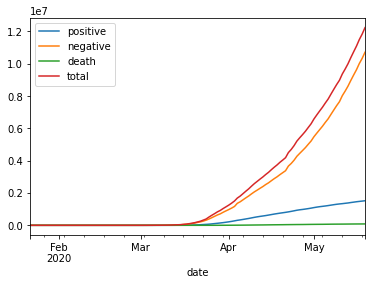

In [90]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

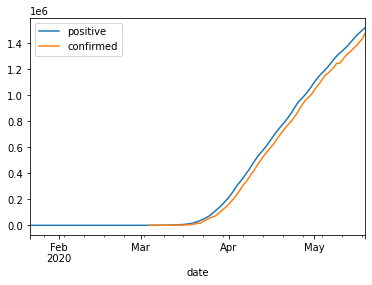

In [91]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [92]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1508308
dead           90347
dtype: int64

In [93]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    81457
dead          3279
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [95]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1508308
Russia             290678
Brazil             255368
United Kingdom     247709
Spain              231606
Italy              225886
France             180051
Germany            176551
Turkey             150593
Iran               122492
Name: confirmed, dtype: int64

In [96]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-19,399,35981,0,16.0,0.0,0.0,0.0,0.0,0.0,348.0,B,5/19/2020 00:00,a6e64be0dcdb35ea2f5116f626fb9e26da9d98ba,2020-05-19T20:00:00Z,10,0.0,36380,36380,36380,02,0.0,0.0,769.0,0.0,769.0
AL,2020-05-19,12376,145190,0,0.0,1453.0,0.0,517.0,0.0,306.0,0.0,B,5/18/2020 00:00,da768efac6b967b10afef712b89563d433bfa593,2020-05-19T20:00:00Z,504,1453.0,157566,157566,157566,01,15.0,37.0,153.0,290.0,443.0
AR,2020-05-19,4923,88778,0,78.0,535.0,0.0,0.0,14.0,101.0,3739.0,A,5/19/2020 00:00,31b7e799d1d456ef327a06e12e0866aabb9dbad3,2020-05-19T20:00:00Z,102,535.0,93701,93701,93701,05,2.0,5.0,8352.0,110.0,8462.0
AS,2020-05-19,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/19/2020 00:00,a6faa2e1ef283fcc8a86234ee19662c95c93290f,2020-05-19T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,19.0,0.0,19.0
AZ,2020-05-19,14566,147005,0,792.0,1746.0,318.0,0.0,201.0,0.0,3693.0,A+,5/19/2020 00:00,93c83b05b7ed3f501b76fc8061f3ada8638d5a69,2020-05-19T20:00:00Z,704,1746.0,161571,161571,161571,04,18.0,29.0,4702.0,396.0,5098.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [99]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-19,46944,2129,46944,1.000000
FL,2020-05-18,46442,2073,46944,0.989306
FL,2020-05-17,45588,2049,46944,0.971115
FL,2020-05-16,44811,2040,46944,0.954563
FL,2020-05-15,43210,1991,46944,0.920458
FL,2020-05-14,43210,1948,46944,0.920458
FL,2020-05-13,42402,1898,46944,0.903246


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

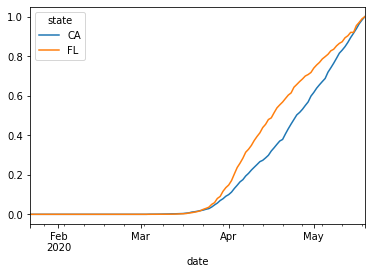

In [101]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

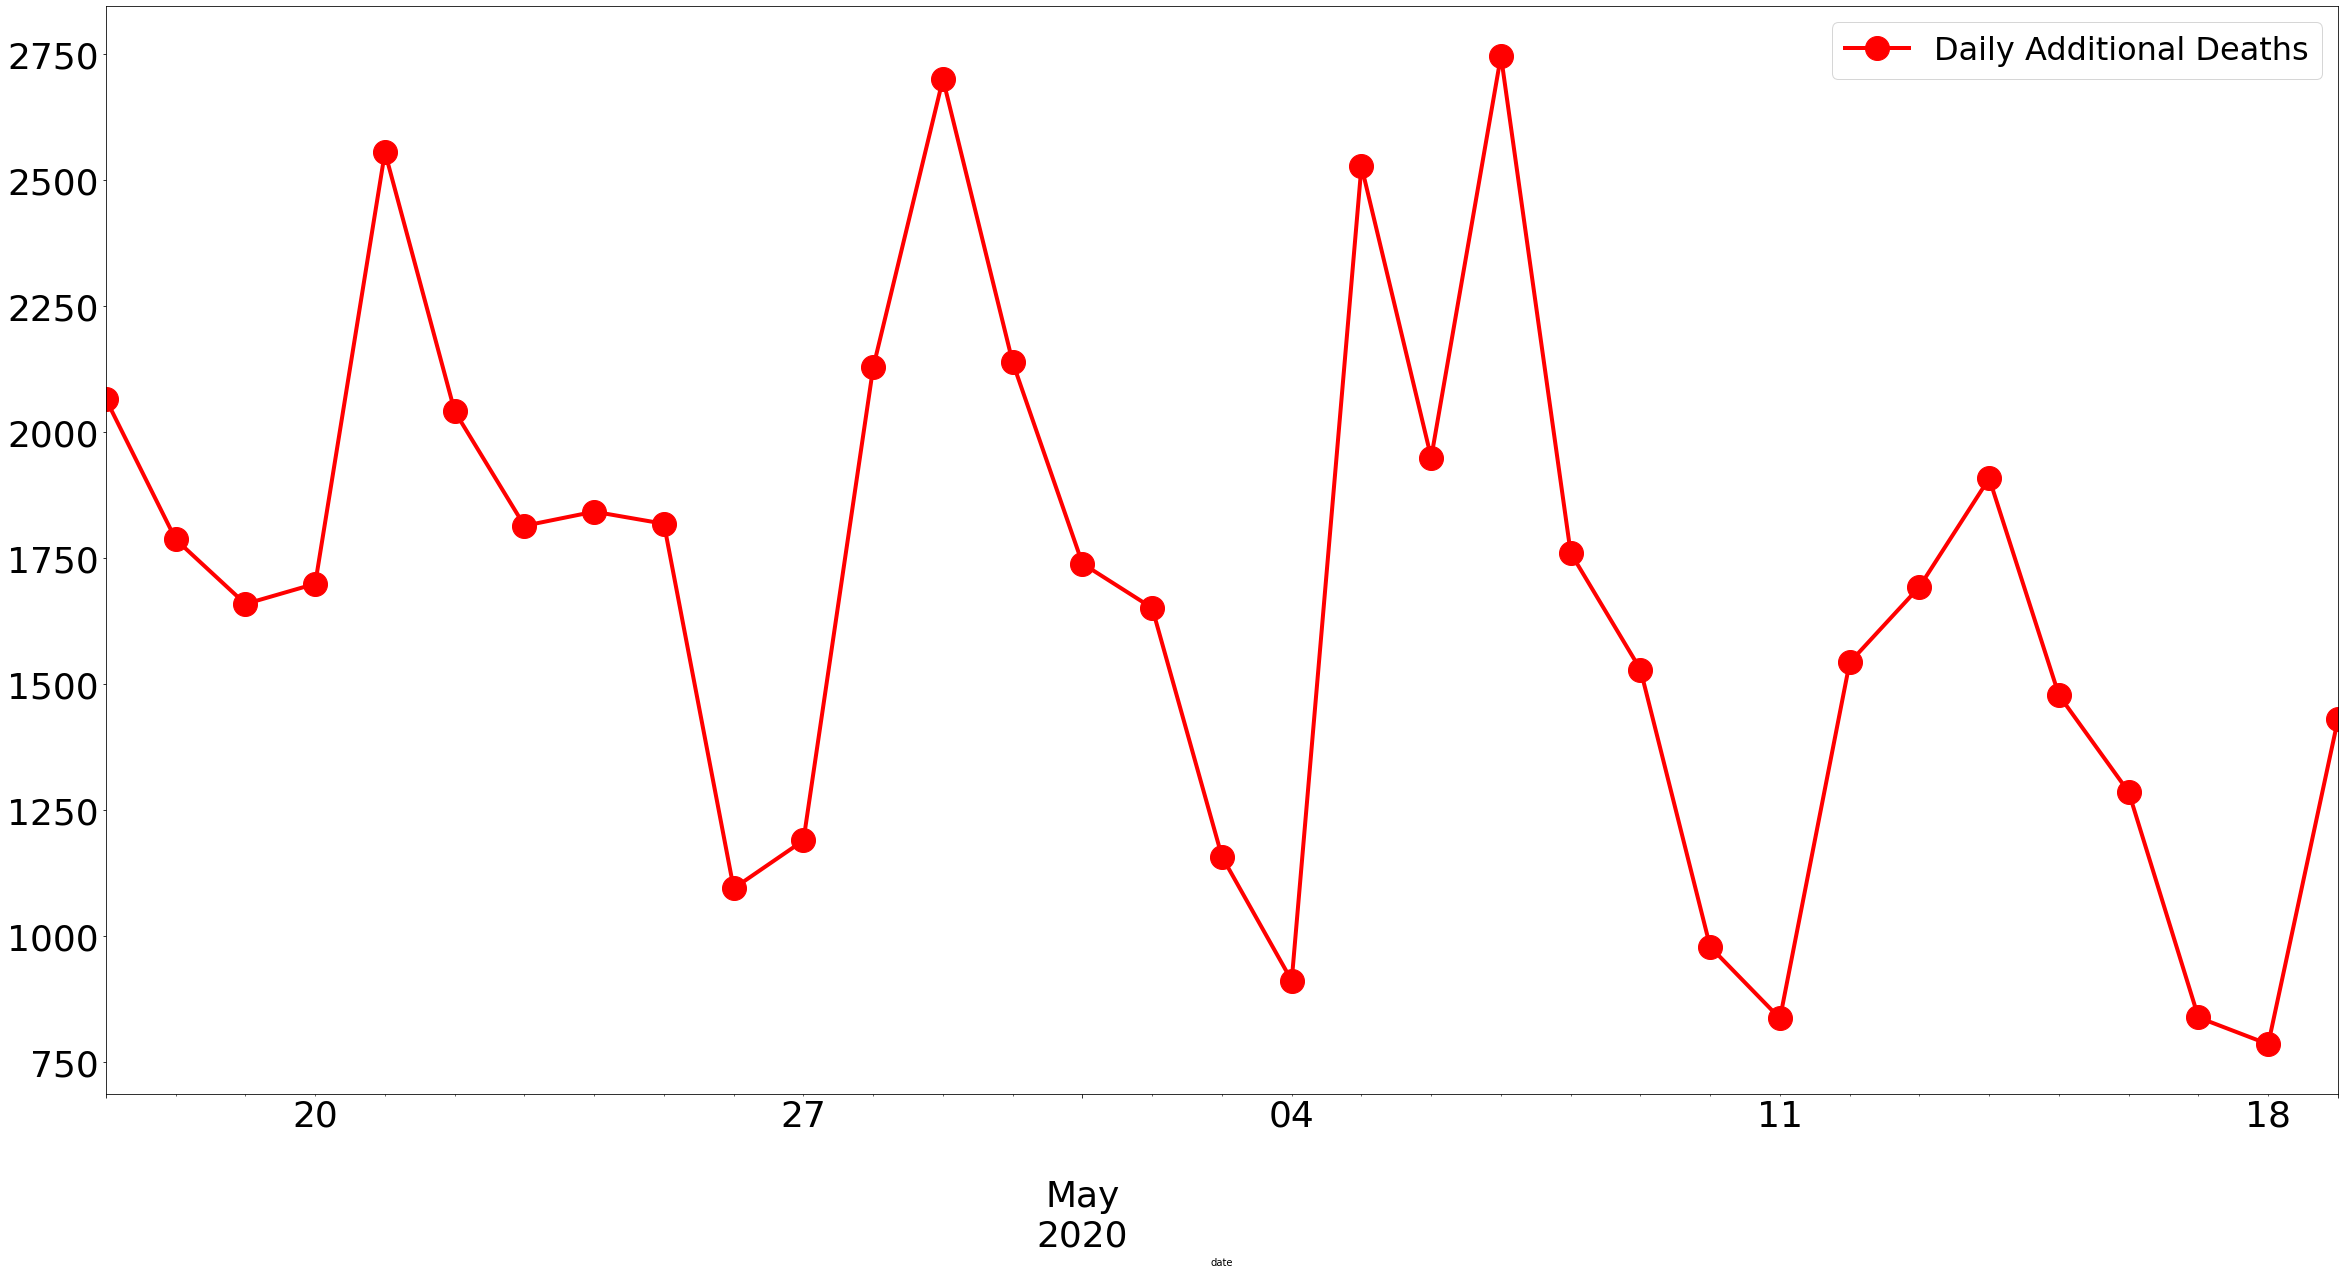

In [103]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


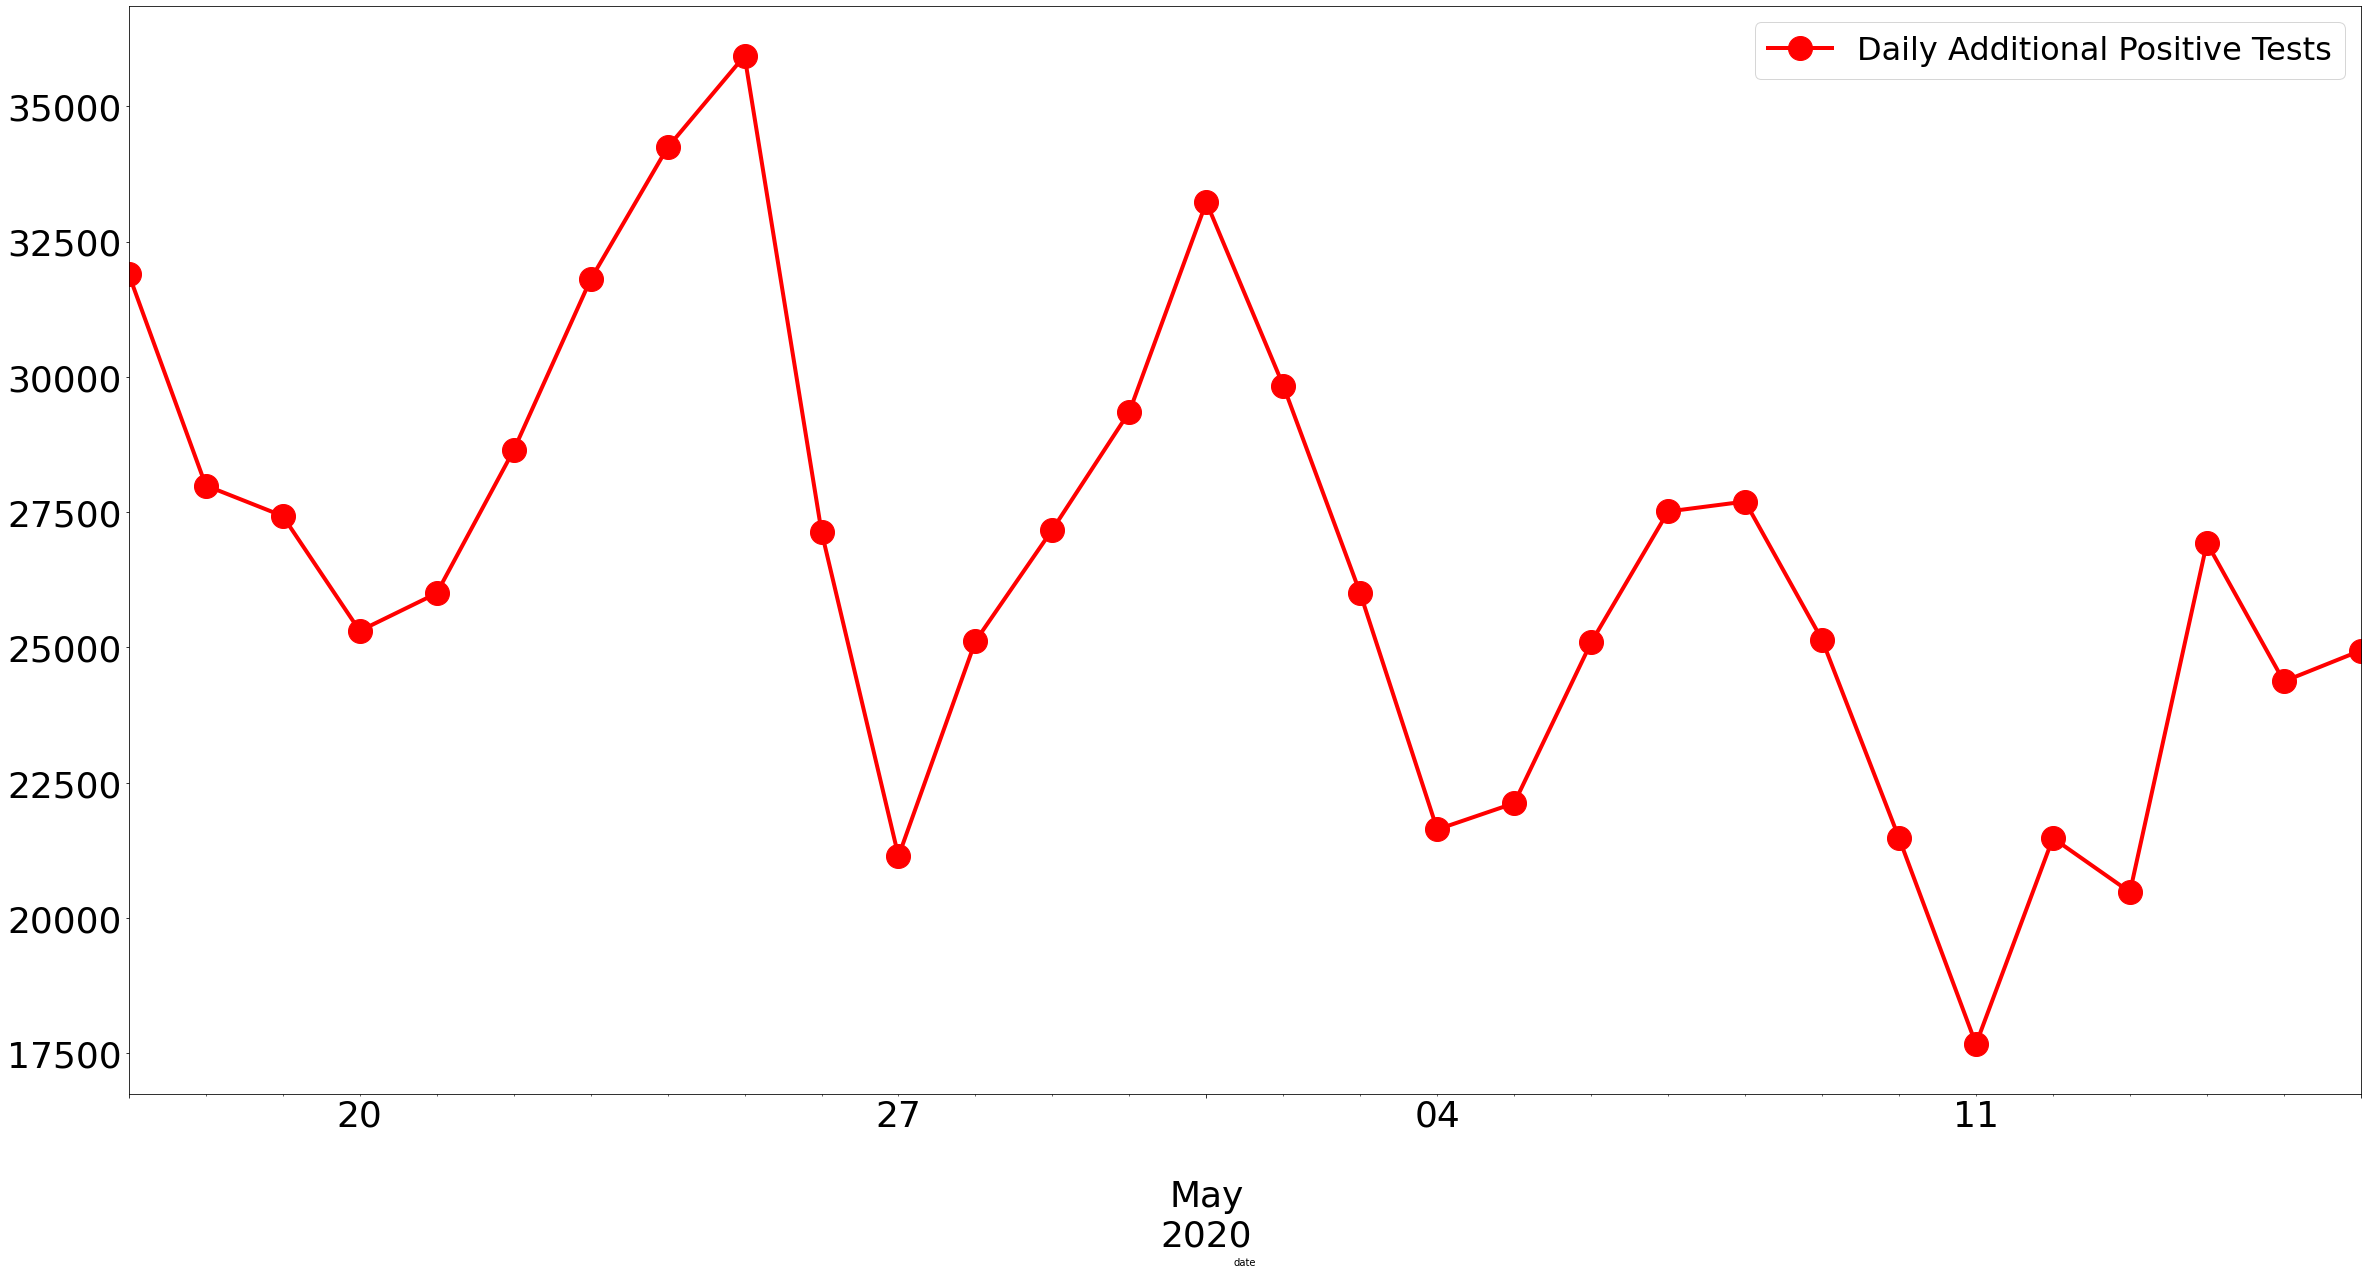

In [104]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


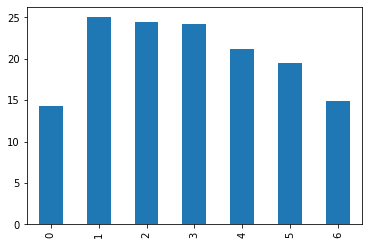

In [107]:
dfDoW.mean().deathIncrease.plot.bar()



In [108]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202015,12523.0,22930.0,835148.0,217015.0,1052163.0
202016,14063.0,21844.0,843853.0,199864.0,1043717.0
202017,12864.0,18239.0,1320695.0,209059.0,1529754.0
202018,12704.0,24854.0,1462229.0,191855.0,1654084.0
202019,12402.0,18984.0,1744751.0,170677.0,1906115.0
202020,9584.0,12125.0,2362886.0,156609.0,2519495.0
202021,2216.0,2729.0,696879.0,40620.0,737499.0


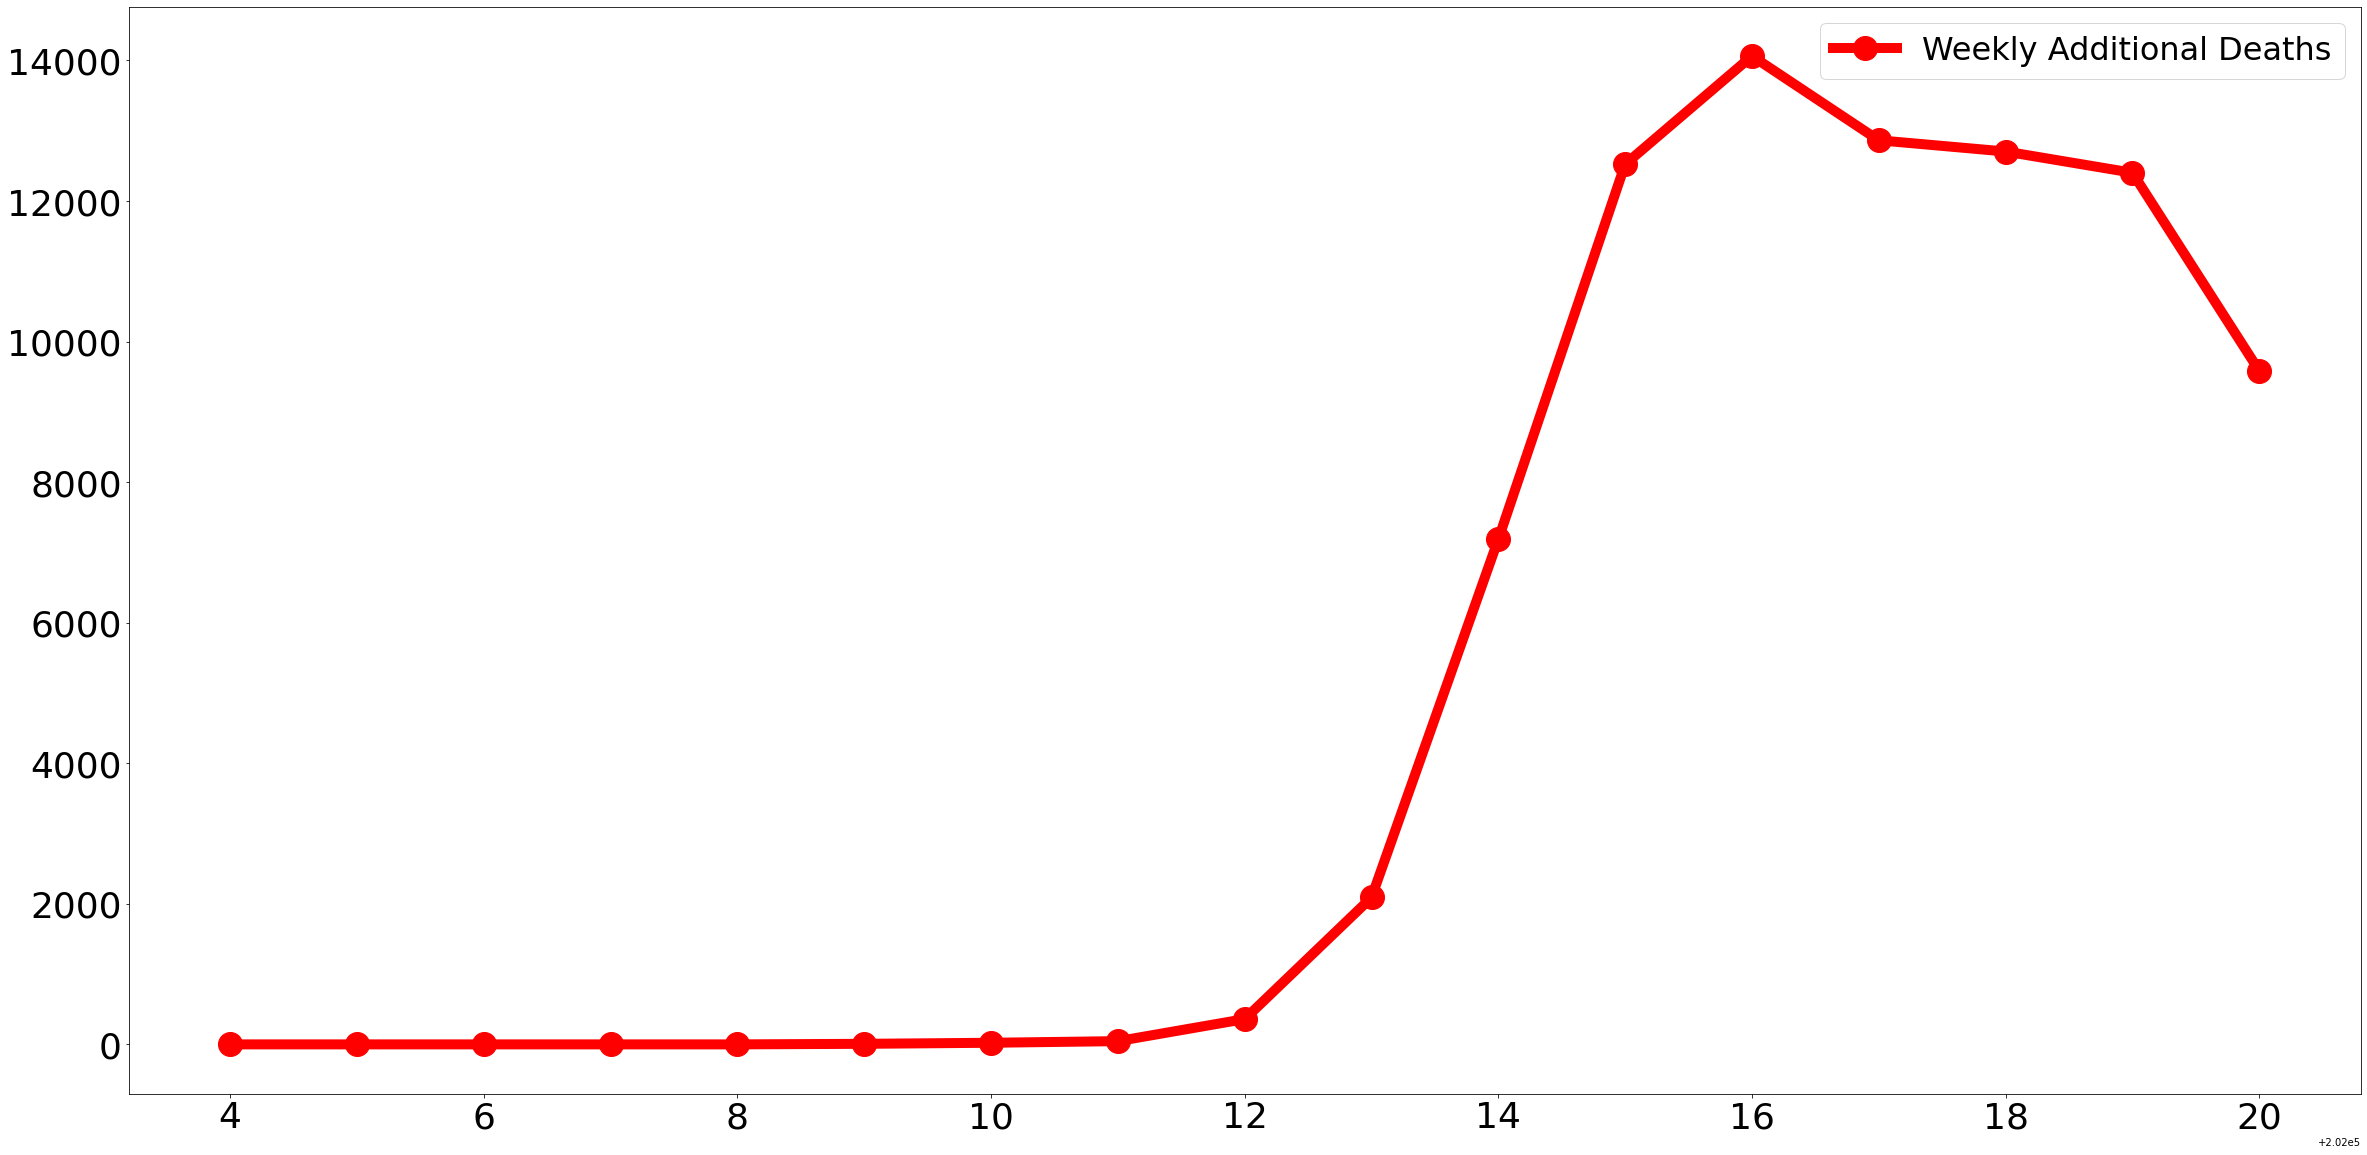

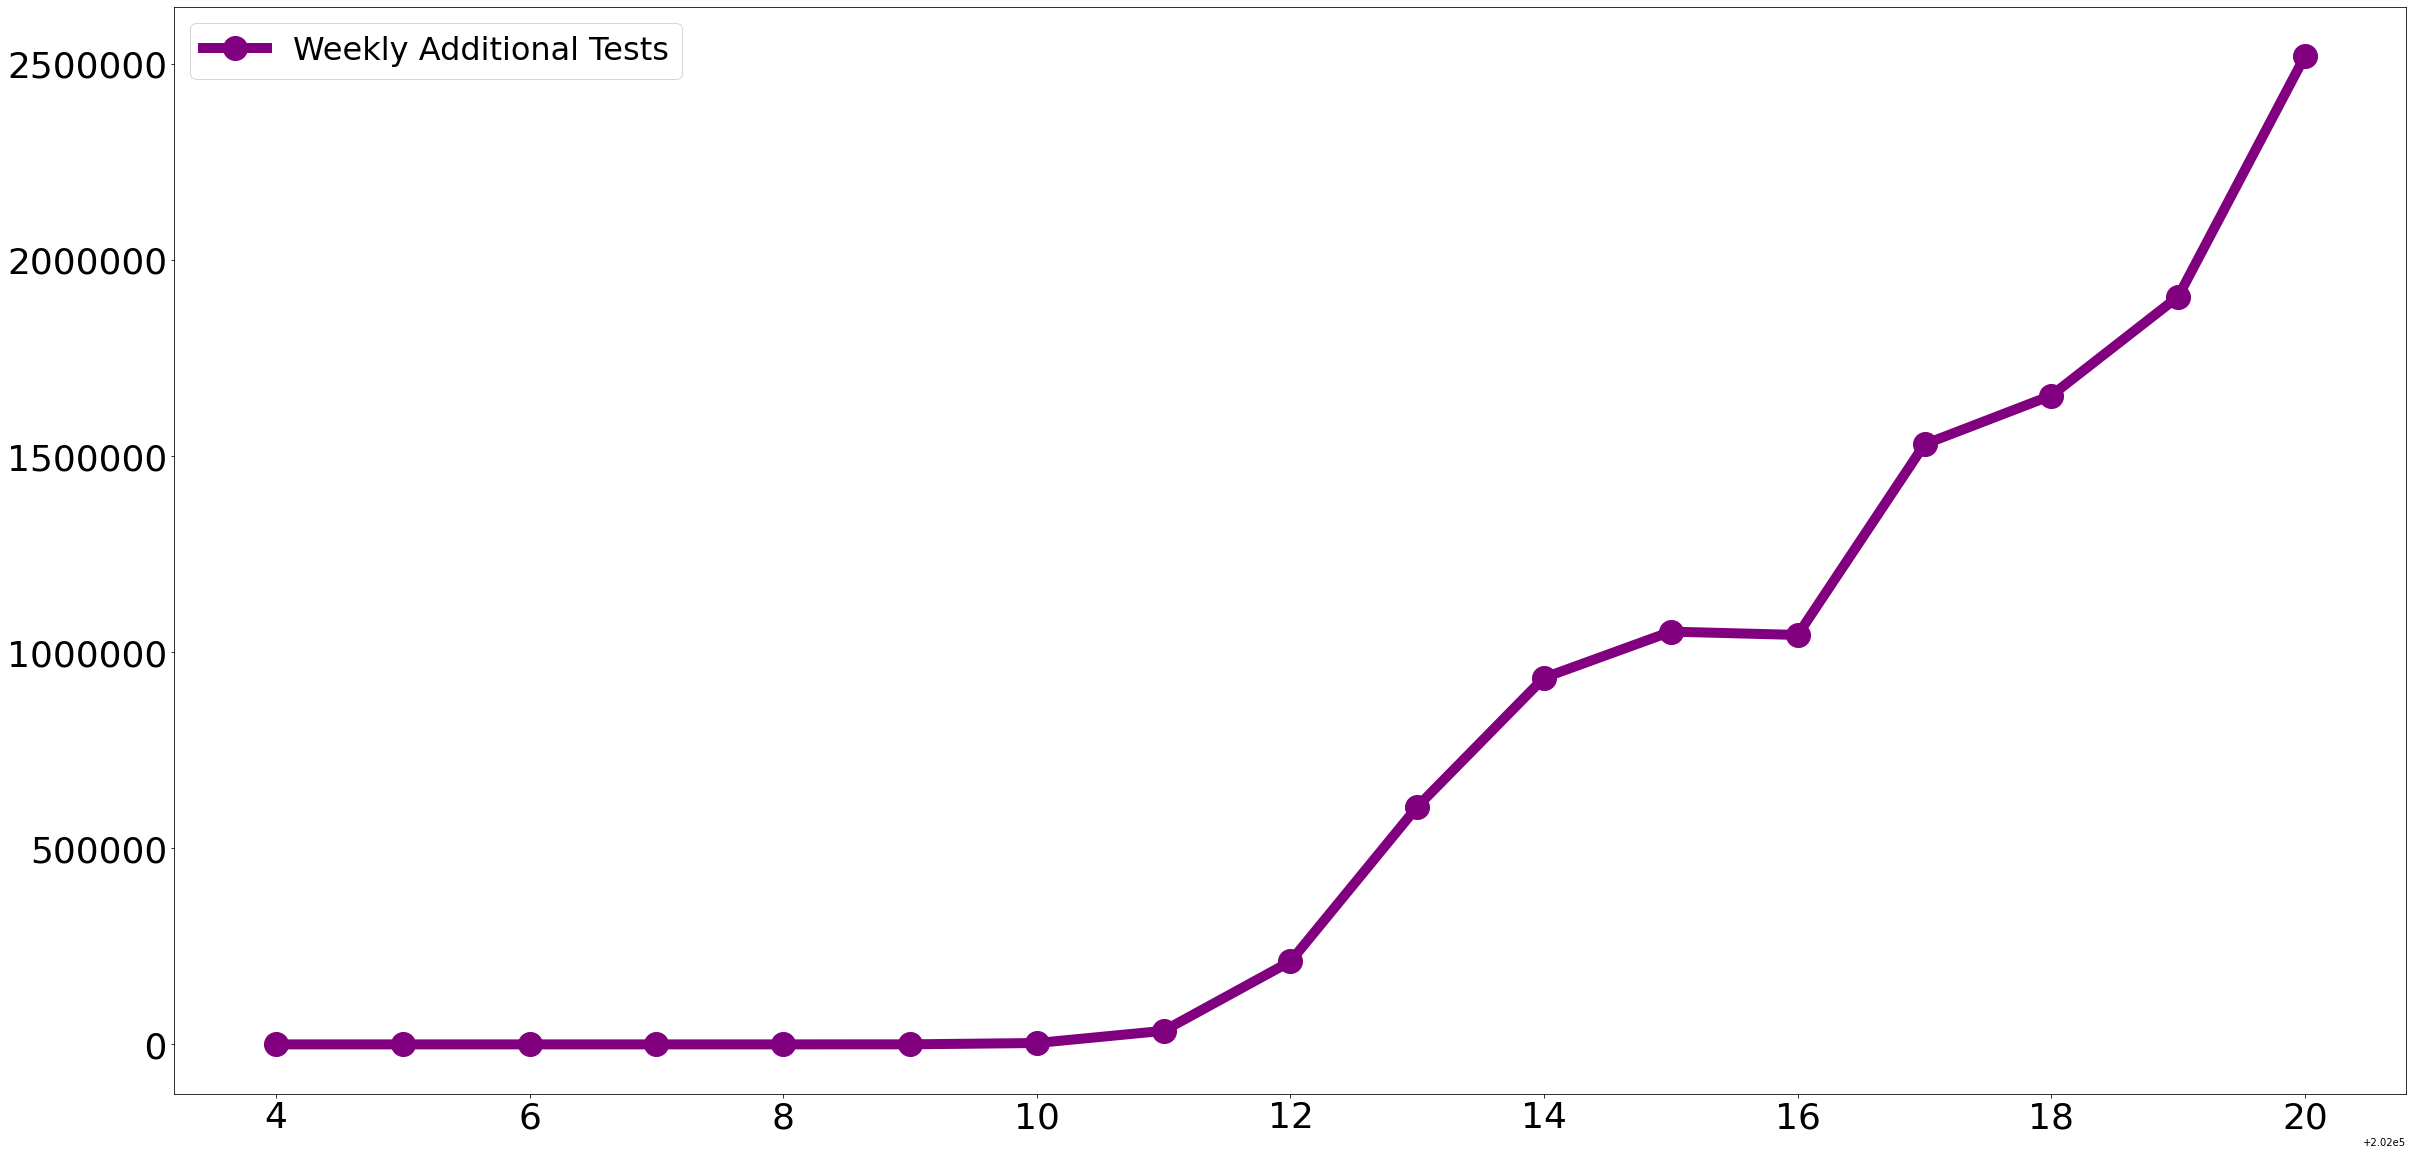

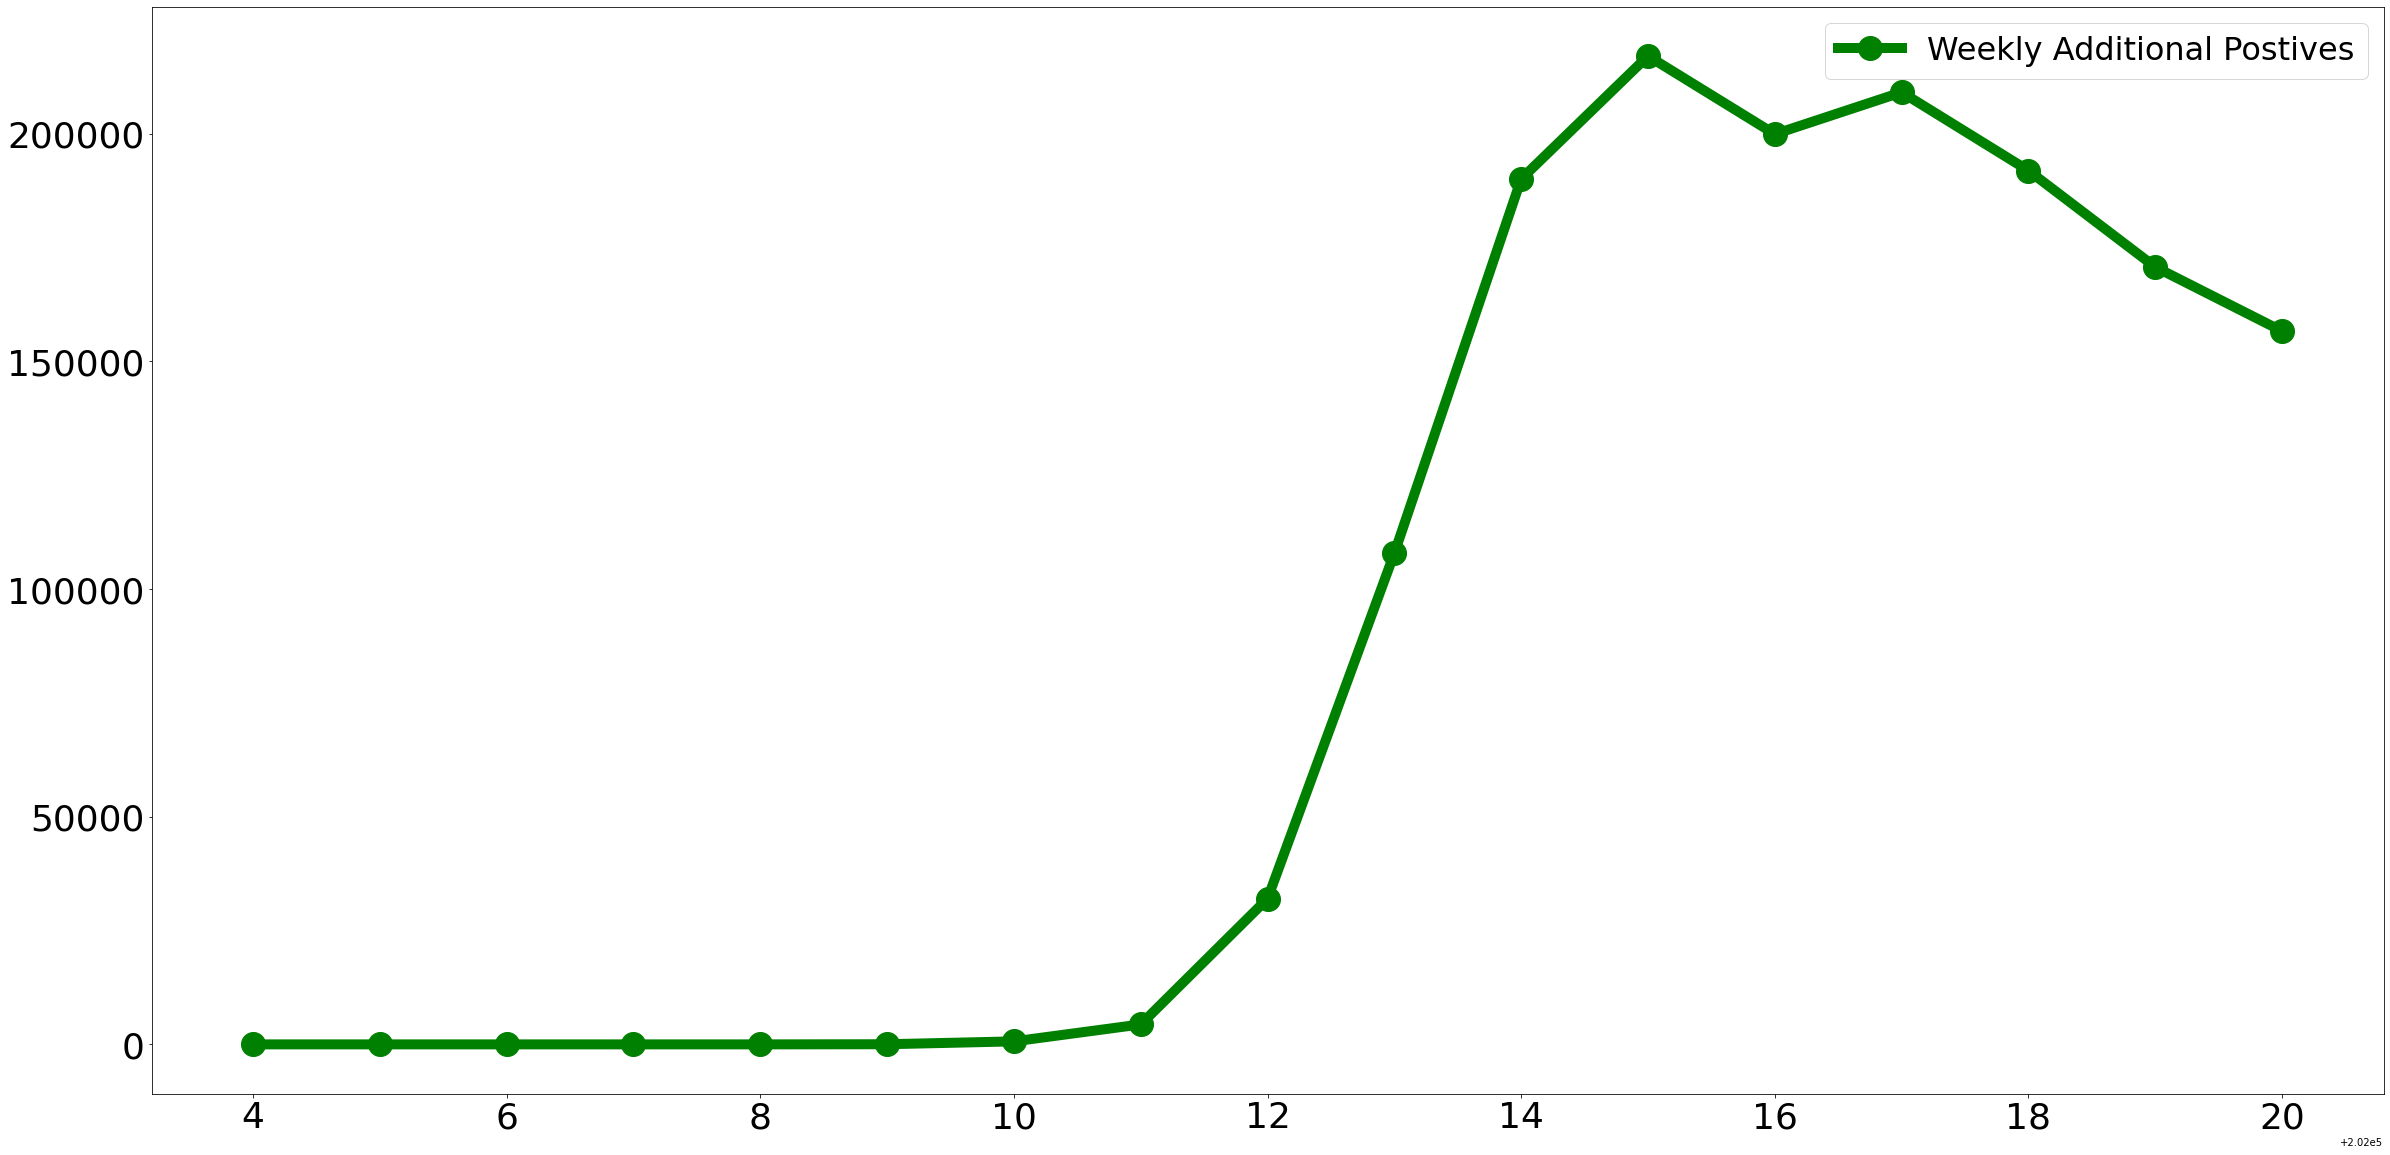

In [109]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

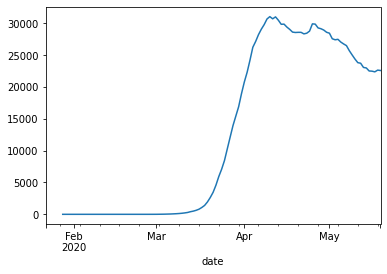

In [110]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

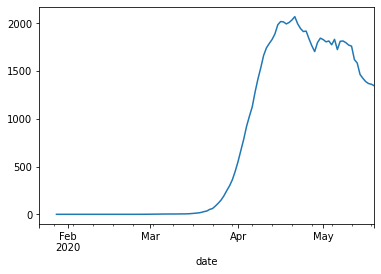

In [111]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

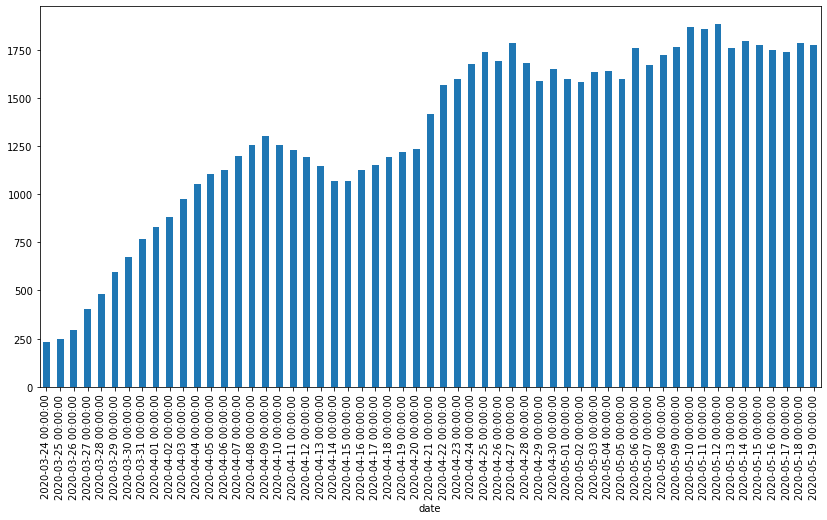

In [113]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


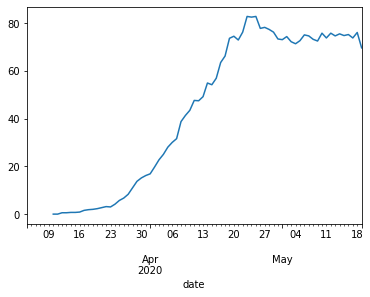

In [114]:
dfCAAvg.deathIncrease.plot.line()

In [115]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
744,FL,2020-05-19,46944,2129,46944,1.000000
745,FL,2020-05-18,46442,2073,46944,0.989306
746,FL,2020-05-17,45588,2049,46944,0.971115
747,FL,2020-05-16,44811,2040,46944,0.954563
748,FL,2020-05-15,43210,1991,46944,0.920458
749,FL,2020-05-14,43210,1948,46944,0.920458
750,FL,2020-05-13,42402,1898,46944,0.903246
751,FL,2020-05-12,41923,1849,46944,0.893043
752,FL,2020-05-11,40982,1805,46944,0.872998
753,FL,2020-05-10,40596,1791,46944,0.864775


In [116]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
1868,MN,2020-05-12,12494,614,17029,0.73369


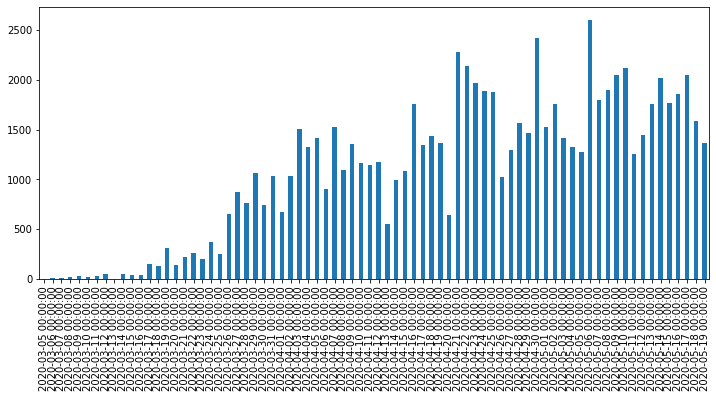

In [117]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar(figsize=(12,5))



# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [120]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1520778
negative    10713209
pending         2944
death          86070
total       12236931
dtype: int64
Current Infection Rate 12.427773%
Percentage of US affected: 0.489535%
Observed CFR: 5.659603%
Percentage of US tested/affected: 3.753374%
Projected affected by cir = 40,792,863
Projected killed = 2,308,715


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [128]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.813781,7.544835
NJ,1.677661,5.856461
MA,1.275661,6.919692
RI,1.222529,11.067615
CT,1.077894,5.203508
DC,1.053349,5.579037
DE,0.825354,4.532104
IL,0.773606,4.906035
LA,0.753701,5.981616


In [129]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 3.727152%


In [130]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [132]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18441 entries, 0 to 18440
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18377 non-null  object 
 1   location                         18441 non-null  object 
 2   date                             18441 non-null  object 
 3   total_cases                      18441 non-null  int64  
 4   new_cases                        18441 non-null  int64  
 5   total_deaths                     18441 non-null  int64  
 6   new_deaths                       18441 non-null  int64  
 7   total_cases_per_million          18071 non-null  float64
 8   new_cases_per_million            18071 non-null  float64
 9   total_deaths_per_million         18071 non-null  float64
 10  new_deaths_per_million           18071 non-null  float64
 11  total_tests                      4829 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [135]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    11834508.0
RUS     7352316.0
DEU     3147771.0
ITA     3104524.0
BRA     3081480.0
          ...    
MMR       15137.0
PRY       14646.0
CRI       14616.0
ZWE       13104.0
BOL       10349.0
Name: total_tests, Length: 84, dtype: float64

In [136]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 43360855
Total tests done in USA : 11834508
How many more times has the world tested more than the US: 3.7


In [137]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-18
total_cases                                                            1486757
new_cases                                                                18873
total_deaths                                                             89562
new_deaths                                                                 808
total_cases_per_million                                                4491.68
new_cases_per_million                                                   57.018
total_deaths_per_million                                               270.578
new_deaths_per_million                                                   2.441
total_tests                                                        1.18345e+07
new_tests                                                               338020
new_tests_smoothed                                  

In [138]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-13,22048,1703
2020-05-14,20782,1746
2020-05-15,27143,1773
2020-05-16,25508,1662
2020-05-17,24487,1186
2020-05-18,18873,808
2020-05-19,21841,791


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


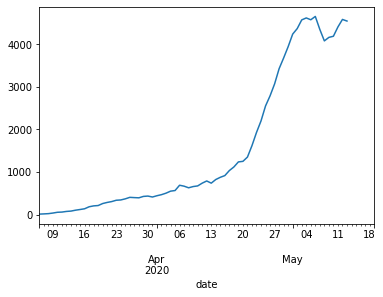

In [140]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [141]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

46442

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [143]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,280.0,859.0,39994.0,4677.0,44671.0
1,397.0,1444.0,62951.0,7143.0,70094.0
2,291.0,1567.0,32075.0,6331.0,38406.0
3,203.0,901.0,44037.0,5058.0,49095.0
4,266.0,1061.0,57529.0,6785.0,64314.0
5,148.0,928.0,51800.0,4436.0,56236.0
6,79.0,267.0,51049.0,4289.0,55338.0


In [144]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")

In [0]:
results = client.get("tvq9-ec9w")


In [0]:

results_df = pd.DataFrame.from_records(results)

In [0]:
res = results_df.astype({'case_count':'int16'})

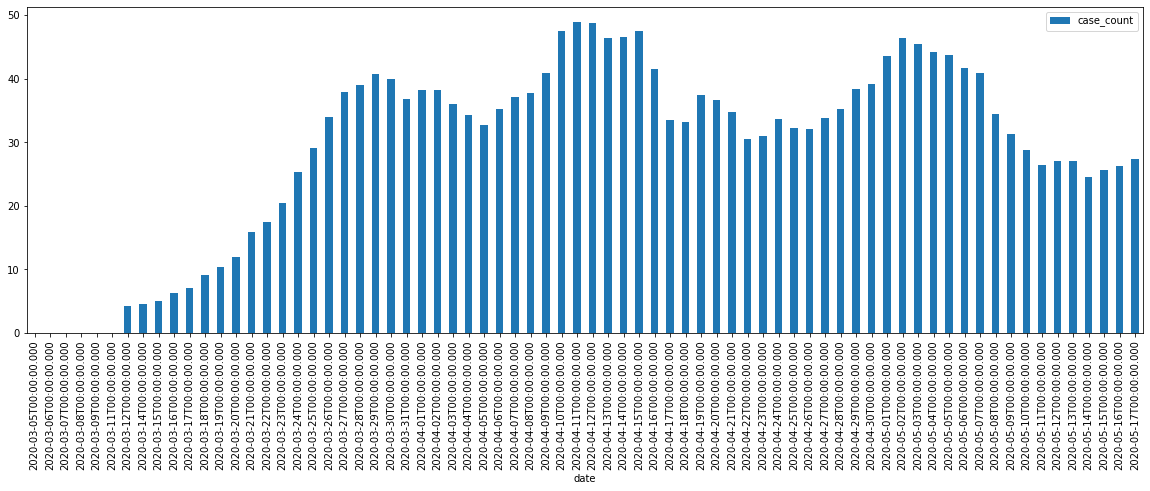

In [150]:
res.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# New Section

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url)

In [152]:
df.head()

,New Total,329,Unnamed: 2,%pos,4.07%,Unnamed: 5,pop,"259,725.00",2.46%
0,date,positive,negative,deaths,pending,tested,hospitalizations,Recovered,NaN
1,20200306,0,0,0,0,NaN,NaN,NaN,0.00%
2,20200307,0,0,0,0,NaN,NaN,NaN,0.00%
3,20200308,1,4,0,8,NaN,NaN,NaN,0.54%
4,20200309,1,4,0,10,NaN,NaN,NaN,0.54%
